In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

data = pd.read_excel('/content/drive/MyDrive/Traitement Automatisé de données/data_principal.xlsx')
data['num_jury'] = [int(data['jury'][i][-2:]) for i in range(data.shape[0])]

col = data.columns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# l'Import du fichier réduit:

- Id des candidats
- Note de l’épreuve groupe sur 15 points: **ep_groupe_sur15**
- Note de l'épreuve de communication, observation et analyse sur 40 points: **ep_COA_sur40**
- Note du QCM sur 34 points: **qcm_sur34**
- Note du dossier: **dossier_sur20**
- Id du Jury en 2 colonnes (ex: 'Jury 17' et 17): **jury** et **num_jury**

In [5]:
data

,Numéro Parcoursup,ep_groupe_sur15,ep_COA_sur40,qcm_sur34,dossier_sur20,jury,num_jury
0,718205,13,34.5,15.0,16.07,Jury 01,1
1,438485,13,21.5,15.5,13.26,Jury 38,38
2,358832,12,30.5,16.5,16.28,Jury 17,17
3,669910,8,27.5,20.0,13.80,Jury 17,17
4,519517,15,40.0,23.5,17.18,Jury 01,1
...,...,...,...,...,...,...,...
447,644561,11,29.5,21.0,15.95,Jury 23,23
448,158805,8,8.0,17.0,15.29,Jury 30,30
449,681436,13,34.0,21.0,16.18,Jury 16,16
450,350009,13,36.5,22.0,13.84,Jury 46,46


# Description des colonnes

Informations descriptives de chaque colonne (épreuve):
- Maximum(max)
- Minimum(min)
- Moyenne(mean)
- ÉCart-type(std)
- Médiane(50%)
- Premier quartile(25%)
- Troisième quartile(75%)

In [6]:
data.describe()

,Numéro Parcoursup,ep_groupe_sur15,ep_COA_sur40,qcm_sur34,dossier_sur20,num_jury
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,497326.935841,11.778761,31.787611,20.065265,15.304823,23.473451
std,224044.454598,2.920178,6.722585,3.648444,1.533766,13.528543
min,102763.000000,1.000000,2.000000,8.500000,6.870000,1.000000
25%,293121.250000,10.000000,28.000000,18.000000,14.210000,12.000000
50%,505962.000000,13.000000,33.000000,20.000000,15.285000,23.000000
75%,681962.500000,14.000000,37.000000,22.500000,16.350000,35.000000
max,881218.000000,15.000000,40.000000,29.000000,18.930000,49.000000


# Distribuition des notes sans prendre en compte la l'influence des Jurys

## Épreuve groupe sur 15 points:
Plutôt bien distribué, avec tendance modère à droite (bonnes notes).  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


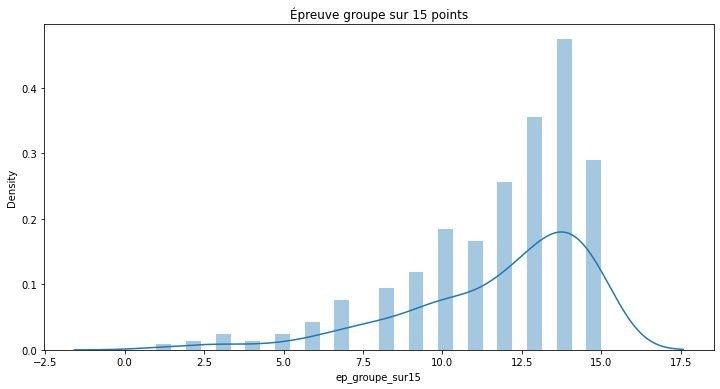

In [7]:
plt.figure(figsize=(12,6))
plt.title('Épreuve groupe sur 15 points')
sns.distplot(data['ep_groupe_sur15'].dropna(), bins=30)

## Épreuve de communication, observation et analyse

Tendance à droite **assez prononcé**: globalement les jurys ont bien noté les candidats sur cette épreuve.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


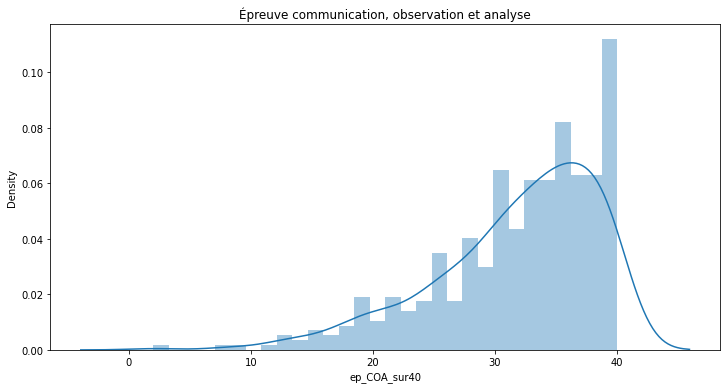

In [8]:
plt.figure(figsize=(12,6))
plt.title('Épreuve communication, observation et analyse')
sns.distplot(data['ep_COA_sur40'].dropna(), bins=30)

## Note QCM (Indépendant des Jurys)

Bien distribué

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


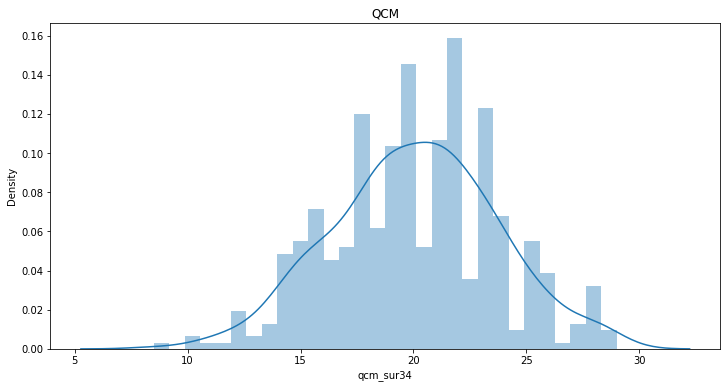

In [9]:
plt.figure(figsize=(12,6))
plt.title('QCM')
sns.distplot(data['qcm_sur34'].dropna(), bins=30)

## Paramètre externe: dossier

Forte concentration entre 14 et 17

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


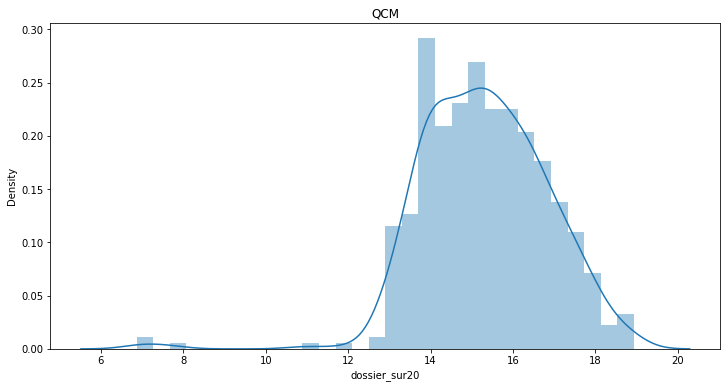

In [10]:
plt.figure(figsize=(12,6))
plt.title('QCM')
sns.distplot(data['dossier_sur20'].dropna(), bins=30)

# Interactions Jury / Épreuves

## Corrélations

- La note obtenu sur l’épreuve groupe est corrélé à 50% avec l'autre épreuve.
- Le Jury ne porte pas d'influence sur la note des épreuves (changer de Jury ne change pas ).
- Avoir un bon dossier est corrélé seulement en 17% pour une épreuve, 23% pour l'autre et 25% avec la note du QCM.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


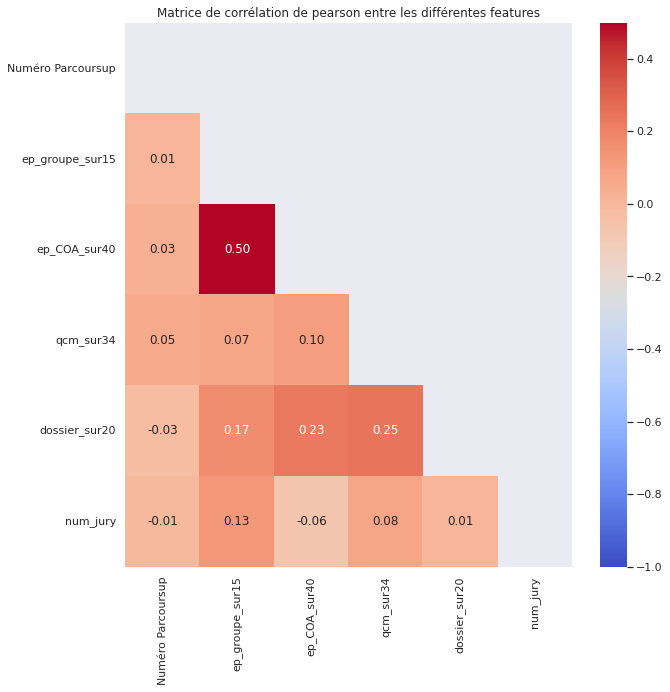

In [11]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
plt.title('Matrice de corrélation de pearson entre les différentes features')

corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm',annot=True,fmt=".2f")
plt.show()
sns.set(font_scale=1)

## Analyse des notes par Jury

Regardez le commentaire que suit le tableau suivant.

In [12]:
#Liste avec les datasets restreints par jury: liste[i] affiche le dataset du jury i+1 i = 0,...,48
liste = []
for i in range(1,50):
    a = data[data['num_jury'] == i]
    liste.append(a)

# composantes de df : dataset avec la moyenne donné par un jury séparé par épreuves
qcm_sur34 = [liste[i]['qcm_sur34'].mean() for i in range(len(liste))]
ep_groupe_sur15 = [liste[i]['ep_groupe_sur15'].mean() for i in range(len(liste))]
ep_COA_sur40 = [liste[i]['ep_COA_sur40'].mean() for i in range(len(liste))]
dossier_sur20 = [liste[i]['dossier_sur20'].mean() for i in range(len(liste))]


d = {'num_jury':[i for i in range(1,50)], 
'moyenne_par_jury_ep_groupe': ep_groupe_sur15, 
'moyenne_par_jury_ep_COA': ep_COA_sur40, 
'moyenne_qcm_par_jury': qcm_sur34,
'moyenne_dossier_par_jury': dossier_sur20}
df = pd.DataFrame(data=d)

df.head(7)

,num_jury,moyenne_par_jury_ep_groupe,moyenne_par_jury_ep_COA,moyenne_qcm_par_jury,moyenne_dossier_par_jury
0,1,13.4,34.25,20.35,16.003
1,2,10.8,33.35,18.70,15.006
2,3,6.7,28.80,21.15,15.305
3,4,10.1,31.30,21.05,15.570
4,5,11.5,31.15,19.75,15.103
5,6,14.7,36.60,21.15,15.065
6,7,11.2,28.80,18.05,15.633


In [13]:
print('Nous avons',str(len(data['num_jury'].unique())),'Jurys au total.')

Nous avons 49 Jurys au total.


Ce tableau contient 49 lignes, chaque ligne (de 0 à 48) correspond à un Jury.
Exemple, pour la ligne 2, nous avons des infos concernant le **jury 3**:

- colonne **'moyenne_par_jury_ep_groupe'**: moyenne produite par le jury 3 lors d'evaluation de l'épreuve par groupe
- colonne **'moyenne_par_jury_ep_COA'**: moyenne produite par le jury 3 lors d'evaluation de l'épreuve comm., observ. et annalyse

## Affichage des notes par Jury

In [14]:
# Exemple: afficher les élèves et les notes concernant le jury 10.
liste[9]

,Numéro Parcoursup,ep_groupe_sur15,ep_COA_sur40,qcm_sur34,dossier_sur20,jury,num_jury
42,648623,12,37.0,22.5,17.51,Jury 10,10
58,647938,13,39.5,18.0,13.25,Jury 10,10
59,392646,11,34.5,26.0,14.00,Jury 10,10
68,592132,13,33.0,20.0,13.52,Jury 10,10
85,535454,10,32.0,12.5,15.67,Jury 10,10
91,734144,10,28.5,13.0,12.97,Jury 10,10
122,158167,12,35.5,21.0,14.51,Jury 10,10
126,630790,9,26.5,19.0,16.57,Jury 10,10
142,571894,14,34.5,18.5,12.98,Jury 10,10
153,461580,10,33.5,21.0,15.29,Jury 10,10


## Existe-il un écart entre les différents jurys ?

In [15]:
df.describe()

,num_jury,moyenne_par_jury_ep_groupe,moyenne_par_jury_ep_COA,moyenne_qcm_par_jury,moyenne_dossier_par_jury
count,49.00000,49.000000,49.000000,49.000000,49.000000
mean,25.00000,11.755525,31.746232,20.094883,15.315849
std,14.28869,1.614910,3.372448,1.225029,0.608659
min,1.00000,6.700000,22.071429,18.050000,13.505556
25%,13.00000,10.800000,30.055556,19.333333,15.059000
50%,25.00000,11.800000,31.600000,19.954545,15.292000
75%,37.00000,12.800000,34.100000,20.777778,15.572000
max,49.00000,14.700000,38.300000,23.750000,17.335000


- l’Écart-type entre la moyenne des notes du dossier des candidats que les 49 différents jurys ont touché est trop petit (0.6) et la moyenne des moyennes est de 15.3. Dons, les profils selon les dossier ont été plutôt bien distribuées aux différents jurys ( au moins du point de vue note du dossier) **(ligne verte graphique ci-après)**

- Pour le qcm l'écart est un peu plus grand mais le minimum est à 18.05 et le maximum à 23.7 avec une moyenne de 20.09. (**ligne rouge**)

- Par contre pour les épreuves ou les candidats ont été évaluées par les jurys nous avons un écart plus prononcé, notamment pour l'épreuve communication, observation et analyse. (**plot orange sur le graphique ci-après**) 

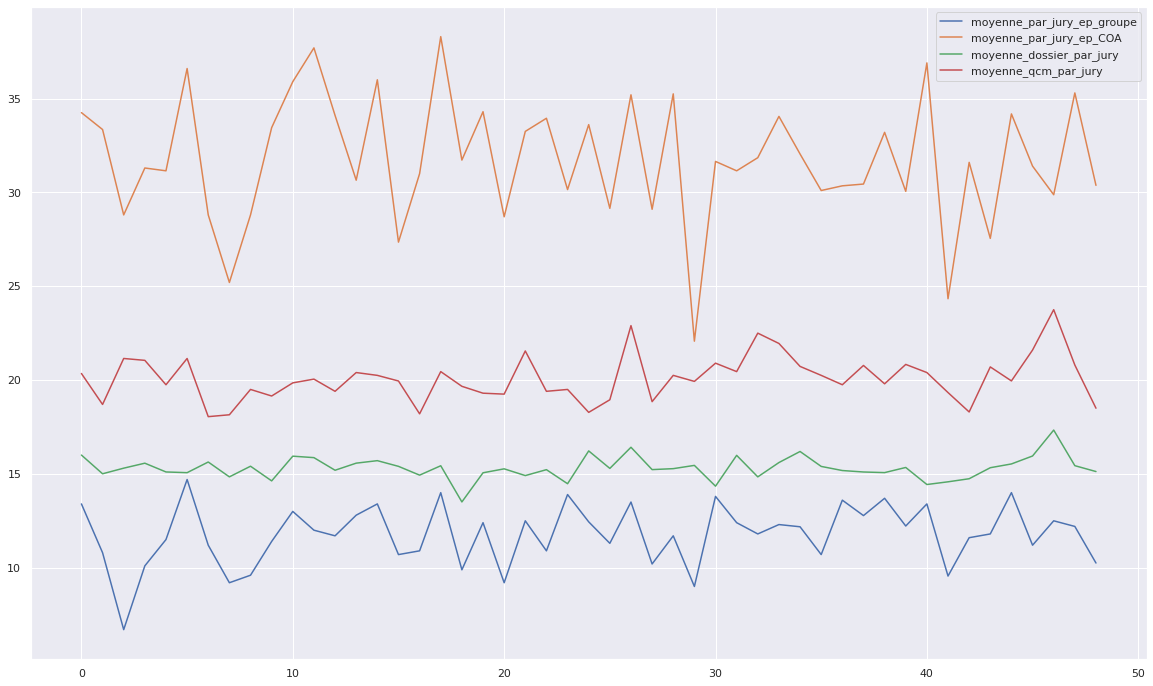

In [16]:
plt.figure(figsize=(20,12))

plt.plot(df['moyenne_par_jury_ep_groupe'], label='moyenne_par_jury_ep_groupe')
plt.plot(df['moyenne_par_jury_ep_COA'], label='moyenne_par_jury_ep_COA')
plt.plot(df['moyenne_dossier_par_jury'], label='moyenne_dossier_par_jury')
plt.plot(df['moyenne_qcm_par_jury'], label='moyenne_qcm_par_jury')
plt.legend()

# Identification des extrêmes

## Épreuve groupe

### Les petites moyennes

In [17]:
a = df['moyenne_par_jury_ep_groupe'].quantile(0.1)
jury_min_gr = df[df['moyenne_par_jury_ep_groupe'] < a]
jury_min_gr

,num_jury,moyenne_par_jury_ep_groupe,moyenne_par_jury_ep_COA,moyenne_qcm_par_jury,moyenne_dossier_par_jury
2,3,6.700000,28.800000,21.150000,15.305000
7,8,9.200000,25.200000,18.150000,14.841000
20,21,9.200000,28.700000,19.250000,15.269000
29,30,9.000000,22.071429,19.928571,15.452857
41,42,9.555556,24.333333,19.333333,14.577778


In [18]:
print("Les 5 Jurys avec les plus petites moyennes pour l'épreuve groupe:")
for i in np.array(jury_min_gr.num_jury):
    print(i)

Les 5 Jurys avec les plus petites moyennes pour l'épreuve groupe:
3
8
21
30
42


### Les grandes moyennes

In [19]:
b = df['moyenne_par_jury_ep_groupe'].quantile(0.9)
jury_max_gr = df[df['moyenne_par_jury_ep_groupe'] > b]
jury_max_gr

,num_jury,moyenne_par_jury_ep_groupe,moyenne_par_jury_ep_COA,moyenne_qcm_par_jury,moyenne_dossier_par_jury
5,6,14.7,36.600000,21.150000,15.065
17,18,14.0,38.300000,20.450000,15.434
23,24,13.9,30.150000,19.500000,14.476
30,31,13.8,31.650000,20.900000,14.345
44,45,14.0,34.181818,19.954545,15.530


In [20]:
print("Les 5 Jurys avec les plus grandes moyennes pour l'épreuve groupe:")
for i in np.array(jury_max_gr.num_jury):
    print(i)

Les 5 Jurys avec les plus grandes moyennes pour l'épreuve groupe:
6
18
24
31
45


## Épreuve communication, observation et analyse.

### Les petites moyennes

In [21]:
a = df['moyenne_par_jury_ep_COA'].quantile(0.1)
jury_min_COA = df[df['moyenne_par_jury_ep_COA'] < a]
jury_min_COA

,num_jury,moyenne_par_jury_ep_groupe,moyenne_par_jury_ep_COA,moyenne_qcm_par_jury,moyenne_dossier_par_jury
7,8,9.200000,25.200000,18.150000,14.841000
15,16,10.700000,27.350000,19.950000,15.402000
29,30,9.000000,22.071429,19.928571,15.452857
41,42,9.555556,24.333333,19.333333,14.577778
43,44,11.800000,27.550000,20.700000,15.329000


In [22]:
print("Les 5 Jurys avec les plus petites moyennes pour l'épreuve COA:")
for i in np.array(jury_min_COA.num_jury):
    print(i)

Les 5 Jurys avec les plus petites moyennes pour l'épreuve COA:
8
16
30
42
44


### Les grandes moyennes

In [23]:
b = df['moyenne_par_jury_ep_COA'].quantile(0.9)
jury_max_COA = df[df['moyenne_par_jury_ep_COA'] > b]
jury_max_COA

,num_jury,moyenne_par_jury_ep_groupe,moyenne_par_jury_ep_COA,moyenne_qcm_par_jury,moyenne_dossier_par_jury
5,6,14.7,36.6,21.15,15.065
11,12,12.0,37.7,20.05,15.866
14,15,13.4,36.0,20.25,15.705
17,18,14.0,38.3,20.45,15.434
40,41,13.4,36.9,20.40,14.434


In [24]:
print("Les 5 Jurys avec les plus petites moyennes pour l'épreuve COA:")
for i in np.array(jury_max_COA.num_jury):
    print(i)

Les 5 Jurys avec les plus petites moyennes pour l'épreuve COA:
6
12
15
18
41


## Afficher les élèves touchées par les 10 jurys "extrêmes" (5 min et 5 max)

Exemple: les élèves que ont été évalués par les 5 jurys ayant données les 5 plus petites moyennes pour l'épreuve COA.

In [25]:
eleves = [np.array(liste[i-1]['Numéro Parcoursup']) for i in np.array(jury_min_COA.num_jury)]
eleves

[array([819829, 304883, 852623, 753262, 447908, 352699, 206107, 739137,
        336063, 854834]),
 array([115601, 725232, 485267, 550971, 390016, 641980, 111002, 628188,
        681436, 161025]),
 array([747406, 679536, 773799, 847872, 259803, 147340, 158805]),
 array([334775, 174376, 841068, 185753, 577706, 632690, 472142, 113376,
        170616]),
 array([304789, 787716, 553682, 584202, 645469, 823435, 753902, 471994,
        652374, 384095])]

In [26]:
print("Les 5 Jurys concernés sont:")
for i in np.array(jury_min_COA.num_jury):
    print(i)

Les 5 Jurys concernés sont:
8
16
30
42
44


Exemple: Voici le détail d'un des ces 5 jurys (le Jury 8)

In [27]:
liste[8-1]

,Numéro Parcoursup,ep_groupe_sur15,ep_COA_sur40,qcm_sur34,dossier_sur20,jury,num_jury
351,819829,7,24.5,14.0,14.96,Jury 08,8
392,304883,12,35.0,17.0,15.03,Jury 08,8
393,852623,6,30.5,15.0,13.66,Jury 08,8
397,753262,11,26.0,21.0,15.18,Jury 08,8
399,447908,8,12.5,19.0,14.05,Jury 08,8
404,352699,14,31.5,14.0,18.22,Jury 08,8
406,206107,12,27.0,18.5,14.04,Jury 08,8
407,739137,2,13.5,22.5,14.81,Jury 08,8
412,336063,9,30.5,17.5,13.75,Jury 08,8
439,854834,11,21.0,23.0,14.71,Jury 08,8
